# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for label, text in zip(train_labels[:num_examples], train_data[:num_examples]):
        print("Post Label: %s\nPost Text: %s\n" % (newsgroups_train.target_names[label], text))

### STUDENT END ###

P1(5)

Post Label: comp.graphics
Post Text: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Post Label: talk.religion.misc
Post Text: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corrupt

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2():
### STUDENT START ###

    # Answer to 2.a.
    vectorizer = CountVectorizer(min_df=1)
    train_data_features = vectorizer.fit_transform(train_data)
    # train_data_features_array = train_data_features.toarray()
    # print train_data_features_array.shape
    r, c = train_data_features.shape
    nz = train_data_features.nnz
    print("\nAnswers to 2.a.")
    print("Shape of feature vector: %s, %s" % (r, c))
    print("Size of vocabulary: %s" % (c))
    print("Average non-zero per example: %.2f" % (nz/float(r)))
    print("Fraction of non-zero: %.6f" % (nz/float(r*c)))

    # Answer to 2.b. 0th and last feature strings
    vocab = vectorizer.get_feature_names()
    print("\nAnswer to 2.b.")
    print("First feature string: %s\nLast feature string: %s" % (vocab[0], vocab[-1]))

    # Answer to 2.c. Specify your own vocab
    vectorizer.vocabulary = ["atheism", "space", "graphics", "religion"]
    train_data_features = vectorizer.fit_transform(train_data)
    r, c = train_data_features.shape
    nz = train_data_features.nnz
    print("\nAnswer to 2.c.")
    print("Shape of feature vector: %s, %s" % (r, c))
    print("Size of vocabulary: %s" % c)
    print("Average non-zero per example: %.2f" % (nz/float(r)))

    # Answer to 2.d. bigrams and trigrams
    # 'Character' Bigrams
    # Note: We can get a much larger feature list using analyzer="word"
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1, 2), analyzer="char")
    train_data_features = vectorizer.fit_transform(train_data)
    print("\nAnswer to 2.d.")
    print("Bigram vocabulary: %s" % (train_data_features.shape[1]))

    # 'Character' Trigrams
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1, 3), analyzer="char")
    train_data_features = vectorizer.fit_transform(train_data)
    print("Trigram vocabulary: %s" % (train_data_features.shape[1]))

    # Answer to 2.e. 
    vectorizer = CountVectorizer(min_df=10, analyzer="word")
    train_data_features = vectorizer.fit_transform(train_data)
    print("\nAnswer to 2.e.")
    print("Vocabulary ignoring words < 10: %s" % (train_data_features.shape[1]))

    # Answer to 2.f. Words in dev_data not in train_data
    vectorizer = CountVectorizer(min_df=1)
    train_data_features = vectorizer.fit_transform(train_data)
    train_vocab = set(vectorizer.get_feature_names()) 
    
    vectorizer = CountVectorizer(min_df=1)
    dev_data_features = vectorizer.fit_transform(dev_data)
    dev_vocab = vectorizer.get_feature_names()
    
    diff = len([x for x in dev_vocab if x not in train_vocab])
    
    print("\nAnswer to 2.f.")
    print("Count of new words in dev_data: %s" % (diff))
    print("Fraction of new words in dev_data: %.4f" % (diff / float(dev_data_features.shape[1])))

### STUDENT END ###
P2()


Answers to 2.a.
Shape of feature vector: 2034, 26879
Size of vocabulary: 26879
Average non-zero per example: 96.71
Fraction of non-zero: 0.003598

Answer to 2.b.
First feature string: 00
Last feature string: zyxel

Answer to 2.c.
Shape of feature vector: 2034, 4
Size of vocabulary: 4
Average non-zero per example: 0.27

Answer to 2.d.
Bigram vocabulary: 3370
Trigram vocabulary: 35557

Answer to 2.e.
Vocabulary ignoring words < 10: 3064

Answer to 2.f.
Count of new words in dev_data: 4027
Fraction of new words in dev_data: 0.2479


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [5]:
def P3():
### STUDENT START ###

    vectorizer = CountVectorizer(min_df=1)
    train_data_features = vectorizer.fit_transform(train_data)
    dev_data_features = vectorizer.transform(dev_data)

    # KNeighborsClassifier
    print("RESULTS FOR KNEIGHBORSCLASSIFIER: ---------------------------------------------")
    knn = KNeighborsClassifier()
    knn.fit(train_data_features, train_labels)
    print("f1_score for KNeighborsClassifier: %s" 
          % (metrics.f1_score(dev_labels, knn.predict(dev_data_features), average="weighted")))
    parameters = {'n_neighbors': np.arange(100)+1}
    gsc = GridSearchCV(knn, parameters, n_jobs=-1)
    gsc.fit(train_data_features, train_labels)
    print("Best estimator: %s\nBest k: %s\nBest score: %s\n" 
          % (gsc.best_estimator_, gsc.best_params_, gsc.best_score_))


    # MultinomialNB
    print("RESULTS FOR MULTINOMIALNB: ---------------------------------------------")
    mnb = MultinomialNB(fit_prior=False)
    mnb.fit(train_data_features, train_labels)
    print("f1_score for MultinomialNB: %s" 
          % (metrics.f1_score(dev_labels, mnb.predict(dev_data_features), average="weighted")))
    parameters = {'alpha': np.arange(0, 1, 0.01)}
    gsc = GridSearchCV(mnb, parameters, n_jobs=-1)
    gsc.fit(train_data_features, train_labels)
    print("Best estimator: %s\nBest alpha: %s\nBest score: %s\n" 
          % (gsc.best_estimator_, gsc.best_params_, gsc.best_score_))


    # LogisticRegression
    print("RESULTS FOR LOGISTICREGRESSION: ---------------------------------------------")
    lr = LogisticRegression(penalty="l2")
    lr.fit(train_data_features, train_labels)
    print("f1_score for Logistic Regression: %s" 
          % (metrics.f1_score(dev_labels, lr.predict(dev_data_features), average="weighted")))
    params = {'C': np.arange(0.01, 1, 0.01)}
    gsc = GridSearchCV(lr, params, n_jobs=-1)
    gsc.fit(train_data_features, train_labels)
    print("Best estimator: %s\nBest C: %s\nBest score: %s\n" 
          % (gsc.best_estimator_, gsc.best_params_, gsc.best_score_))

    # Squared sums for logistic regression
    print("SQUARED SUMS FOR LOGISTICREGRESSION: ---------------------------------------------")
    squared_sums = [(x, dict()) for x in params.items()[0][1]]

    for i, c in enumerate(params.items()[0][1]):
        lr = LogisticRegression(penalty="l2", C=c, n_jobs=-1)
        lr.fit(train_data_features, train_labels)
        for j in range(lr.coef_.shape[0]): 
            squared_sums[i][1][newsgroups_train.target_names[j]] = np.sum(lr.coef_[j]**2)

    for t in squared_sums:
        print("C: %s Squared Sums: %s" % (t[0], t[1]))

### STUDENT END ###

P3()

RESULTS FOR KNEIGHBORSCLASSIFIER: ---------------------------------------------
f1_score for KNeighborsClassifier: 0.428760723622
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=96, p=2,
           weights='uniform')
Best k: {'n_neighbors': 96}
Best score: 0.444444444444

RESULTS FOR MULTINOMIALNB: ---------------------------------------------
f1_score for MultinomialNB: 0.777326209563
Best estimator: MultinomialNB(alpha=0.02, class_prior=None, fit_prior=False)
Best alpha: {'alpha': 0.02}
Best score: 0.826450344149

RESULTS FOR LOGISTICREGRESSION: ---------------------------------------------
f1_score for Logistic Regression: 0.694417287185
Best estimator: LogisticRegression(C=0.17000000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', t

ANSWER:

a. Why doesn't nearest neighbors work well for this problem?

*There will be a lot of common features across classes because of the nature of the English language (common words and terms used to explain ideas). KNN picks a category by ranking the closest documents using Euclidean distance. It's possible that documents that are closes to a given example belong to a different category than the example.*

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

*I think that Logistic Regression performs worse because unlike Naive Bayes it tries to directly compute the probability of a class give a sample of features. It then chooses the class with the highest probability among the set of classes. Naive Bayes considers the prior probability of the class and, I think, that's likely why it performs better than Logistic Regression.*


c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

*Per the sklearn docs, C represents the "inverse of regularization strength". The squared sums of coefficients increased as the value of C increased. Or, as we reduced regularization, the weights increased. That's because by reducing regularization we reduce the penalty for learning large weights.*

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [12]:
def P4():
### STUDENT START ###
    
    # Find five highest weighted unigrams per class
    vectorizer = CountVectorizer(min_df=1)
    train_data_features = vectorizer.fit_transform(train_data)
    vocab = np.asarray(vectorizer.get_feature_names())

    lr = LogisticRegression(penalty="l2", C=0.17, n_jobs=-1)
    lr.fit(train_data_features, train_labels)

    result_table = [[], [], [], [], [], []]
    for i in range(lr.coef_.shape[0]): 
        indices = np.argpartition(lr.coef_[i], -5)[-5:] 
        for index in indices: 
            result_table[0].append(index)
            result_table[1].append(vocab[index])

    for index in result_table[0]:
        for i in range(lr.coef_.shape[0]):
            result_table[i+2].append(round(lr.coef_[i][index], 2))
    
    print("\nHighest weighted unigrams: ----------------------------------------")
    print("feature, %s, %s, %s, %s" % 
          (newsgroups_train.target_names[0], newsgroups_train.target_names[1], 
           newsgroups_train.target_names[2], newsgroups_train.target_names[3]))
    for row in zip(result_table[1], result_table[2], result_table[3], result_table[4], result_table[5]):
        print('\t'.join(map(str, row)))

    # Bigrams
    # Find five highest weighted bigrams per class
    vectorizer = CountVectorizer(min_df=1, ngram_range=(2, 2), analyzer="word")
    train_data_features = vectorizer.fit_transform(train_data)
    vocab = np.asarray(vectorizer.get_feature_names())

    lr = LogisticRegression(penalty="l2", C=0.17, n_jobs=-1)
    lr.fit(train_data_features, train_labels)

    result_table = [[], [], [], [], [], []]
    for i in range(lr.coef_.shape[0]): 
        indices = np.argpartition(lr.coef_[i], -5)[-5:] 
        for index in indices: 
            result_table[0].append(index)
            result_table[1].append(vocab[index])

    for index in result_table[0]:
        for i in range(lr.coef_.shape[0]):
            result_table[i+2].append(round(lr.coef_[i][index], 2))
            
    print("\nHighest weighted bigrams: ----------------------------------------")
    print("feature, %s, %s, %s, %s" % 
          (newsgroups_train.target_names[0], newsgroups_train.target_names[1], 
           newsgroups_train.target_names[2], newsgroups_train.target_names[3]))
    for row in zip(result_table[1], result_table[2], result_table[3], result_table[4], result_table[5]):
        print('\t'.join(map(str, row)))
### STUDENT END ###

P4()


Highest weighted unigrams: ----------------------------------------
feature, alt.atheism, comp.graphics, sci.space, talk.religion.misc
islam	0.5	-0.09	-0.2	-0.2
atheists	0.57	-0.09	-0.19	-0.39
bobby	0.59	-0.14	-0.2	-0.28
atheism	0.59	-0.25	-0.25	-0.3
religion	0.59	-0.36	-0.47	-0.01
computer	-0.01	0.65	-0.4	-0.28
file	-0.2	0.77	-0.5	-0.35
3d	-0.22	0.67	-0.39	-0.22
image	-0.32	0.79	-0.46	-0.26
graphics	-0.48	1.19	-0.79	-0.45
spacecraft	-0.21	-0.23	0.49	-0.18
launch	-0.26	-0.29	0.57	-0.2
space	-0.78	-0.84	1.45	-0.7
orbit	-0.26	-0.4	0.72	-0.32
nasa	-0.33	-0.31	0.63	-0.3
order	-0.44	-0.05	-0.09	0.52
fbi	-0.16	-0.14	-0.27	0.52
christian	-0.32	-0.23	-0.22	0.66
blood	-0.27	-0.08	-0.13	0.56
christians	-0.42	-0.2	-0.26	0.63

Highest weighted bigrams: ----------------------------------------
feature, alt.atheism, comp.graphics, sci.space, talk.religion.misc
are you	0.33	-0.18	-0.08	-0.19
is not	0.34	-0.17	-0.33	0.03
in this	0.35	-0.01	-0.35	-0.08
cheers kent	0.39	-0.46	-0.45	0.4
claim that	0.37	

ANSWER:

Looking at unigrams, I was surprised to see "Islam" and "bobby" get a high weight in alt.atheism. I was also surprised to see a high weight for "fbi" and "blood" in talk.religion.misc.

Looking at the list of bigrams, I was surprised to see common phrases such as "are you", "is not", "in this", "is there" etc. receiving high weights in some categories. It appears that people posting in certain categories, e.g. alt.atheism and comp.graphics, use these bigrams more often than people posting in sci.space and talk.religion.misc categories.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [7]:
### STUDENT START ###
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    # lower case everything
    s = s.lower()
    
    # replace number sequences with a single token
    s = re.sub('\d+', 'N', s)
    
    # remove non-letter characters  
    # s = re.sub(r'[^\w\s]', '', s)
    
    # shorten long words (stemming)
    # s = re.sub('(?:s$|ed$|ing$|ant$|ent$|ly$|ion$|ions$)', '', s)
    s = re.sub('(?:s|ed|ing|ant|ent|ly|ion|ions)', '', s)
    
    return s
### STUDENT END ###

def P5():
### STUDENT START ###
    vectorizer = CountVectorizer(min_df=1, preprocessor=better_preprocessor)
    train_data_features = vectorizer.fit_transform(train_data)
    dev_data_features = vectorizer.transform(dev_data)
    vocab = np.asarray(vectorizer.get_feature_names())
    print("Size of vocabulary with preprocessor: %s" % len(vocab))

    lr = LogisticRegression(C=0.17, fit_intercept=True, n_jobs=-1, penalty='l2')
    lr.fit(train_data_features, train_labels)

    print("f1_score for Logistic Regression: %s\n" % 
          (metrics.f1_score(dev_labels, lr.predict(dev_data_features), average="weighted")))
    
### STUDENT END ###
P5()

Size of vocabulary with preprocessor: 18722
f1_score for Logistic Regression: 0.718730572006



ANSWER: 

Vocabulary size was reduced to 18722 from the original 26879, a reduction of ~30% (8157 features).

The f1_score improved from 0.6944 to 0.7187, an increase of 0.0243 (2.43%). Stemming, using lower-case and replacing numbers yielded the best results. Replacing special characters did not work well for me but then again I'm severely limited in my ability to use Regex correcly.

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

Non-zero weights with 'l1' penalty: 541
Non-zero weights with 'l2' penalty: 26879


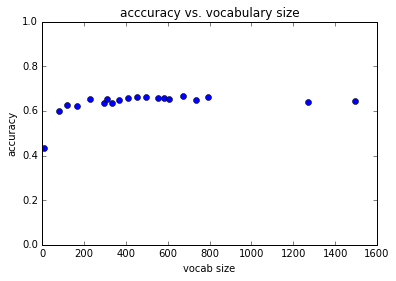

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    vectorizer = CountVectorizer(min_df=1)
    train_data_features = vectorizer.fit_transform(train_data)
    dev_data_features = vectorizer.transform(dev_data)
    vocab = np.asarray(vectorizer.get_feature_names())

    lr1 = LogisticRegression(n_jobs=-1, penalty='l1')
    lr1.fit(train_data_features, train_labels) 
    print("Non-zero weights with 'l1' penalty: %s" % (np.count_nonzero(lr1.coef_[1])))
    
    lr2 = LogisticRegression(n_jobs=-1, penalty='l2')
    lr2.fit(train_data_features, train_labels)
    print("Non-zero weights with 'l2' penalty: %s" % (np.count_nonzero(lr2.coef_[1])))
    
    # Loop over values of C
    params = {'C': np.arange(0.01, 2, 0.10)}
    results = [[],[]]
    for i, c in enumerate(params.items()[0][1]):

        lr1 = LogisticRegression(n_jobs=-1, C=c, penalty='l1')
        lr1.fit(train_data_features, train_labels)
        # Get indices of elements with non-zero weights with 'l1' penalty
        nonzero_indices = np.nonzero(lr1.coef_[1])
        
        # Reset vectorizer vocabulary using unique values with at least one non-zero weight
        vectorizer.vocabulary = np.unique(vocab[nonzero_indices[0]])
        vectorizer._validate_vocabulary()
        
        # Retrain a model with 'l2' penalty and new vorabulary
        train_features_tran = vectorizer.transform(train_data)
        dev_features_tran = vectorizer.transform(dev_data)
        lr2 = LogisticRegression(penalty="l2", C=c, n_jobs=-1, tol=0.01)
        lr2.fit(train_features_tran, train_labels)
        
        results[0].append(len(nonzero_indices[0]))
        results[1].append(metrics.f1_score(dev_labels, lr2.predict(dev_features_tran), average="weighted"))

    plt.plot(results[0], results[1], 'o')
    plt.ylim([0, 1])
    plt.title('acccuracy vs. vocabulary size')
    plt.xlabel('vocab size')
    plt.ylabel('accuracy')
    plt.show()
    
    ### STUDENT END ###
P6()

ANSWER:

l2 penalty results in approximately 50x more non-zero weights than l1 penalty.

Accuracy increases very gradually as vocabulary size increases but levels out after about 400 words.

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [9]:
def P7():
### STUDENT START ###
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
    
    train_data_features = vectorizer.fit_transform(train_data)
    dev_data_features = vectorizer.transform(dev_data)
    
    lr = LogisticRegression(penalty='l1', C=100, n_jobs=-1)
    lr.fit(train_data_features, train_labels)
    
    print("F1_score, logistic regression with l1 penalty: %s\n" % 
          (metrics.f1_score(dev_labels, lr.predict(dev_data_features), average="weighted")))
    
    predicted = lr.predict_proba(dev_data_features)
    
    results = [[], [], [], []]
    for i, item in enumerate(predicted):
        
        # predicted class
        results[2].append(newsgroups_train.target_names[np.argmax(item)])
        
        # actual class
        actual_class = newsgroups_test.target_names[dev_labels[i]]
        results[3].append(actual_class)
        
        # find the probability of actual class predicted by the classifier
        actual_class_prob = item[dev_labels[i]]
        
        # append the post text and the R value
        results[0].append(dev_data[i])
        results[1].append(np.max(item) / actual_class_prob)
    
    top_three_indices = np.argpartition(results[1], -3)[-3:]
    for i in top_three_indices: 
        print("\nPOST: %s ------------------------------------------------" % (i))
        print("R: %s" % (results[1][i]))
        print("Predicted Class: %s" % (results[2][i]))
        print("Actual Class: %s" % (results[3][i]))
        print("Post Text: \n%s" % (results[0][i]))
### STUDENT END ###
P7()

F1_score, logistic regression with l1 penalty: 0.719537422237


POST: 215 ------------------------------------------------
R: 208294.966762
Predicted Class: comp.graphics
Actual Class: talk.religion.misc
Post Text: 
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, cop

ANSWER:

TfidfVectorizer multiplies the term frequency (word frequency in document d) with the log of the **inverse** of the frequency of documents that contain the word. That is inverse document frequency is defined as N/N_t where N is the number of documents and N_t is the number of documents containing the term t.

It seems that the classifier has done a fair job with l1 penalty. It seems to have confused religion with graphics in one case (post 215) and atheism with space in another (post 607). In one instance though (post 368), where the actual class is religion and the predicted class is graphics, the langauge of the post seems to be very specific to computers. It could be that the author of the post was using an analogy from computing to illustrate something about religion, or it could be that the post has been misclassified. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

ANSWER: 

I will use an algorithm called Okapi BM25 for classifying dev_data. http://ipl.cs.aueb.gr/stougiannis/bm25.html

BM25 is typically used in search and works by scoring a query against a document. Presumably, the document that gets the highest query score is considered the best match in BM25.

I will adapt the BM25 to classification as follows:
- Extract a set of query terms in each of the four classes: atheism, graphics, space, religion. I will do this by using the "n" features with the highest weights in each class. "n" can be used as a hyperparameter to tweak the model.
- Calculate a BM25 score for the query terms of each class for each document in the dev_data.
- Compare the class that has the highest BM25 score with the class assigned to the document in dev_labels.

In [249]:
# create a few helper functions for BM25 score calculation

from math import log
from collections import defaultdict

# covert a document into words
def get_words(document):
    return re.compile('\w+').findall(document)

# calculate the term frequency of a search term (query) in a document
def term_frequency(query_term, document):
    # convert query_term and document to lower case
    query_term = query_term.lower()
    words = get_words(document.lower())
    term_freq = 0
    for word in words:
        if query_term == word:
            term_freq += 1
    return term_freq

# calculate inverse document frequency weight of the query term
def inverse_doc_freq(query_term, document_collection):
    query_term = query_term.lower()
    document_collection = np.asarray(document_collection)
    doc_freq = 0
    for doc in document_collection:
        if term_frequency(query_term, doc) > 0:
            doc_freq += 1   
    return log((document_collection.shape[0] - doc_freq + 0.5)/(doc_freq + 0.5))

# calculate the average document length in a document collection
def avg_doc_length(document_collection):
    document_collection = np.asarray(document_collection)
    length = 0.
    for doc in document_collection:
        length += len(set(get_words(doc.lower())))
    return length/document_collection.shape[0]

# calculate inverse document frequency weights for each query
# in a set of query terms 
def create_query_idfs(query_terms, document_collection):
    query_idfs = defaultdict(float)
    for query in query_terms:
        query_idfs[query] = inverse_doc_freq(query, document_collection)
    return query_idfs

# calculate the bm25 score for query terms and a document
def bm25_score(queryterms_idfs, document, avgdl, k=2.0, b=0.75): 
    score = 0.
    for query, idf in queryterms_idfs.iteritems(): 
        tf = term_frequency(query, document) 
        score += idf*tf*(k+1) / (tf + k * (1 - b + (b* len(set(get_words(document.lower())))/avgdl)))    
    return score

In [273]:
# Build query terms for each of the four classes
vectorizer = CountVectorizer(min_df=1)
train_data_features = vectorizer.fit_transform(train_data)
vocab = np.asarray(vectorizer.get_feature_names())

lr = LogisticRegression(penalty="l1", C=0.17, n_jobs=-1)
lr.fit(train_data_features, train_labels)

class_queries = [] 

# set the number of query terms in each class
nterms = 50
for i in range(lr.coef_.shape[0]): 
    indices = np.argpartition(lr.coef_[i], -nterms)[-nterms:] 
    for index in indices: 
        class_queries.append(vocab[index])

# let's separate out query terms for each class
alt_atheism = class_queries[:nterms]
comp_graphics = class_queries[nterms:nterms*2]
sci_space = class_queries[nterms*2:nterms*3]
talk_religion_misc = class_queries[nterms*3:]


In [274]:
# calculate inverse document frequency weights 
# for each query term in each class
alt_atheism_idfs = create_query_idfs(alt_atheism, train_data)
comp_graphics_idfs = create_query_idfs(comp_graphics, train_data)
sci_space_idfs = create_query_idfs(sci_space, train_data)
talk_religion_misc_idfs = create_query_idfs(talk_religion_misc, train_data)

In [275]:
# calculate the average length of documents in dev_data
avgdl = avg_doc_length(dev_data)

# initialize an array to store bm25 scores 
scores = np.zeros([len(dev_data), 4])

# add bm25 scores to the score array 
for index, doc in enumerate(dev_data):
    scores[index, 0] = bm25_score(alt_atheism_idfs, doc, avgdl)
    scores[index, 1] = bm25_score(comp_graphics_idfs, doc, avgdl)
    scores[index, 2] = bm25_score(sci_space_idfs, doc, avgdl)
    scores[index, 3] = bm25_score(talk_religion_misc_idfs, doc, avgdl)

In [276]:
# calculate the accuracy of the model 
correct = 0.
for index, row in enumerate(scores):
    if np.argmax(row) == dev_labels[index]: 
        correct += 1

print("BM25 Model Accuracy: %s" % (correct/len(dev_data)))

BM25 Model Accuracy: 0.66124260355


It turns out that my approach only yielded ~65% accuracy which is ~5% less accurate than logistic regression with tfidf vectorizer.